# The Palmer Penguins Dataset

The Palmer penguins dataset was collected by Dr. Kristen Gorman and others at the Palmer Archipelago Long-Term Ecological Research Station in Antarctica. For a sample of 344 penguins, it specifies sex, island, 4 different physical measurements, and the species of which they belong to. Note that the word 'culmen', used in the features of 'culmen length' and 'culmen depth', refers to the top margin of the beak.

This data can be used for a classification exercise - the objective being to correctly determine species for as many penguins as possible, based on the other available information.

<img src="gentoo_penguins.jpg" style="height: 500px; width:auto;"></br></br>

# Import Libraries and Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

In [2]:
df = pd.read_csv('penguins.csv')
df.head()

,Island,Sex,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Species
0,Torgersen,MALE,39.1,18.7,181.0,3750.0,Adelie
1,Torgersen,FEMALE,39.5,17.4,186.0,3800.0,Adelie
2,Torgersen,FEMALE,40.3,18.0,195.0,3250.0,Adelie
3,Torgersen,NaN,NaN,NaN,NaN,NaN,Adelie
4,Torgersen,FEMALE,36.7,19.3,193.0,3450.0,Adelie


# Inspect Data

In [3]:
df.shape

(344, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Island               344 non-null    object 
 1   Sex                  333 non-null    object 
 2   Culmen Length (mm)   342 non-null    float64
 3   Culmen Depth (mm)    342 non-null    float64
 4   Flipper Length (mm)  342 non-null    float64
 5   Body Mass (g)        342 non-null    float64
 6   Species              344 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [5]:
df.isnull().sum()

Island                  0
Sex                    11
Culmen Length (mm)      2
Culmen Depth (mm)       2
Flipper Length (mm)     2
Body Mass (g)           2
Species                 0
dtype: int64

In [6]:
df.dropna(axis=0, how='any', inplace=True)

In [7]:
class_counts = df.groupby('Species').size()
print(class_counts)

Species
Adelie       146
Chinstrap     68
Gentoo       119
dtype: int64


In [8]:
class_counts = df.groupby('Sex').size()
print(class_counts)

Sex
FEMALE    165
MALE      168
dtype: int64


# Visualization

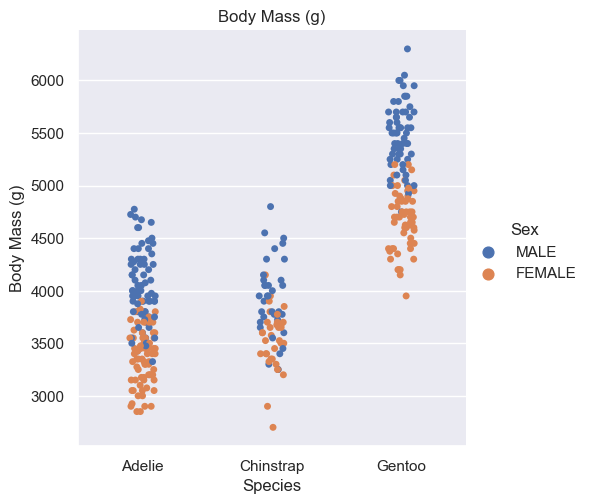

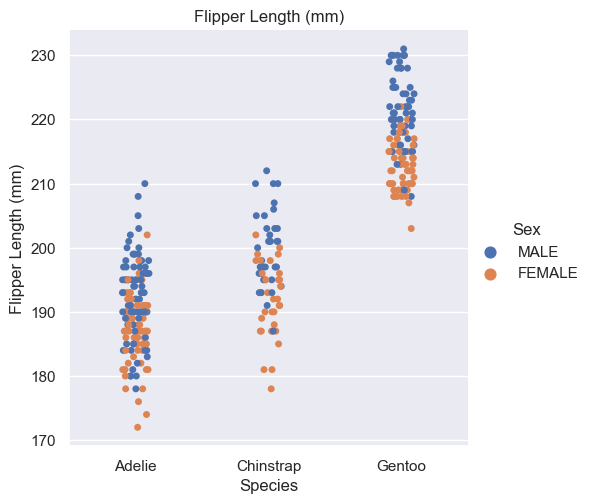

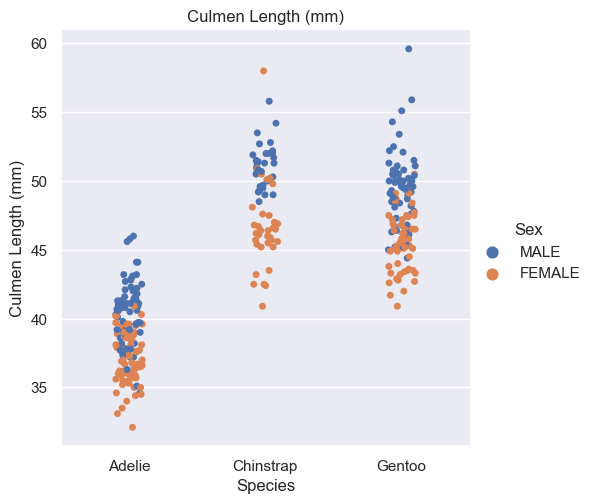

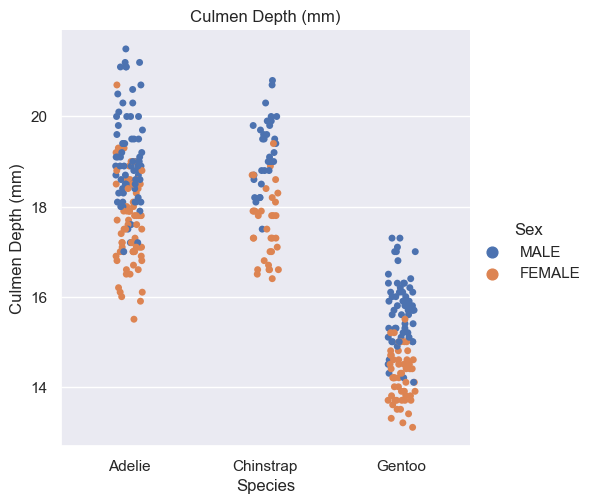

In [9]:
_ = sns.catplot(x = 'Species', y = 'Body Mass (g)', data = df, hue="Sex").set(title="Body Mass (g)") 
_ = sns.catplot(x = 'Species', y = 'Flipper Length (mm)', data = df, hue="Sex").set(title="Flipper Length (mm)") 
_ = sns.catplot(x = 'Species', y = 'Culmen Length (mm)', data = df, hue="Sex").set(title="Culmen Length (mm)") 
_ = sns.catplot(x = 'Species', y = 'Culmen Depth (mm)', data = df, hue="Sex").set(title="Culmen Depth (mm)")
plt.show()

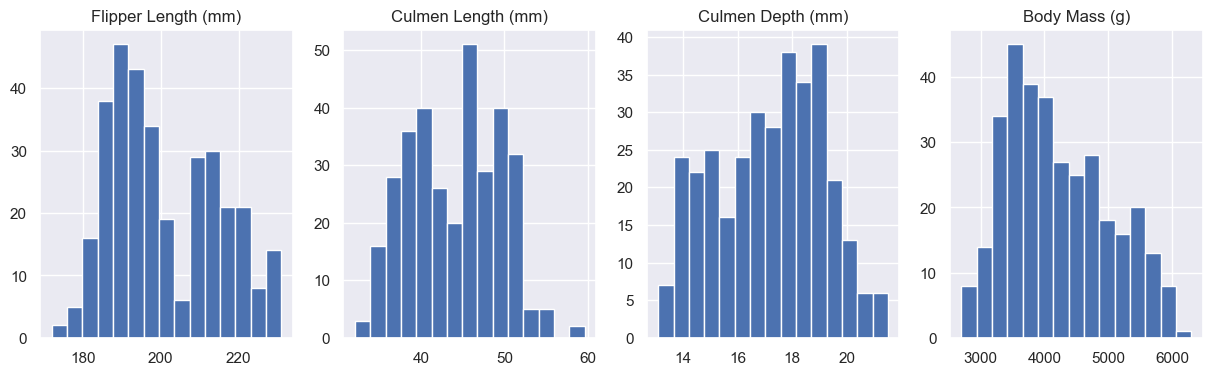

In [10]:
fig, ax = plt.subplots(1, 4, figsize = (15, 4))

k = 15

ax[0].hist(df["Flipper Length (mm)"], bins=k)
ax[0].set_title('Flipper Length (mm)')

ax[1].hist(df["Culmen Length (mm)"], bins = k)
ax[1].set_title('Culmen Length (mm)')

ax[2].hist(df["Culmen Depth (mm)"], bins = k)
ax[2].set_title('Culmen Depth (mm)')

ax[3].hist(df["Body Mass (g)"], bins = k)
ax[3].set_title('Body Mass (g)')

plt.show()

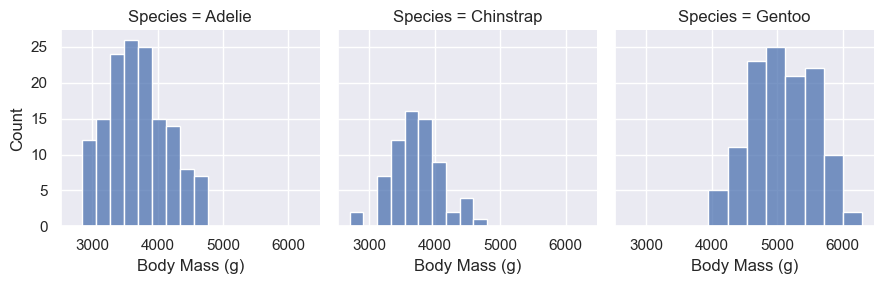

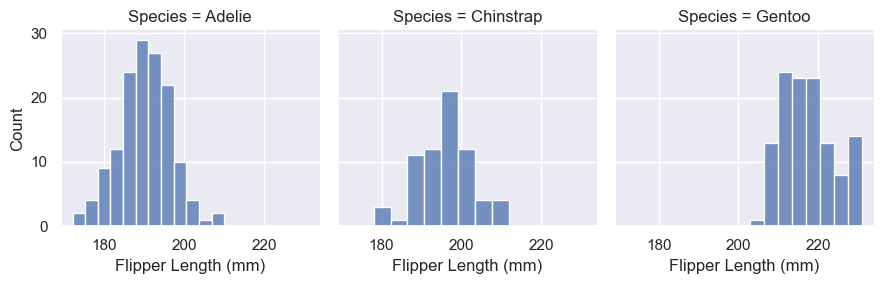

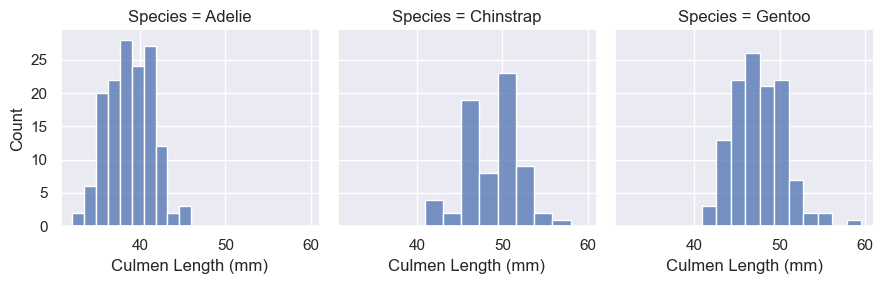

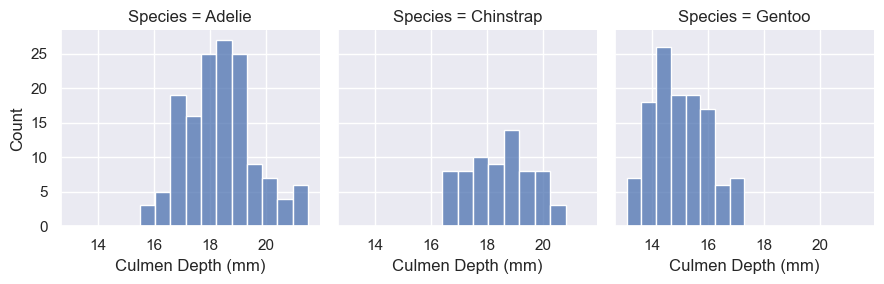

In [11]:
c = sns.FacetGrid(df, col="Species")
_ = c.map(sns.histplot, "Body Mass (g)")

c = sns.FacetGrid(df, col="Species")
_ = c.map(sns.histplot, "Flipper Length (mm)")

c = sns.FacetGrid(df, col="Species")
_ = c.map(sns.histplot, "Culmen Length (mm)")

c = sns.FacetGrid(df, col="Species")
_ = c.map(sns.histplot, "Culmen Depth (mm)")

plt.show()

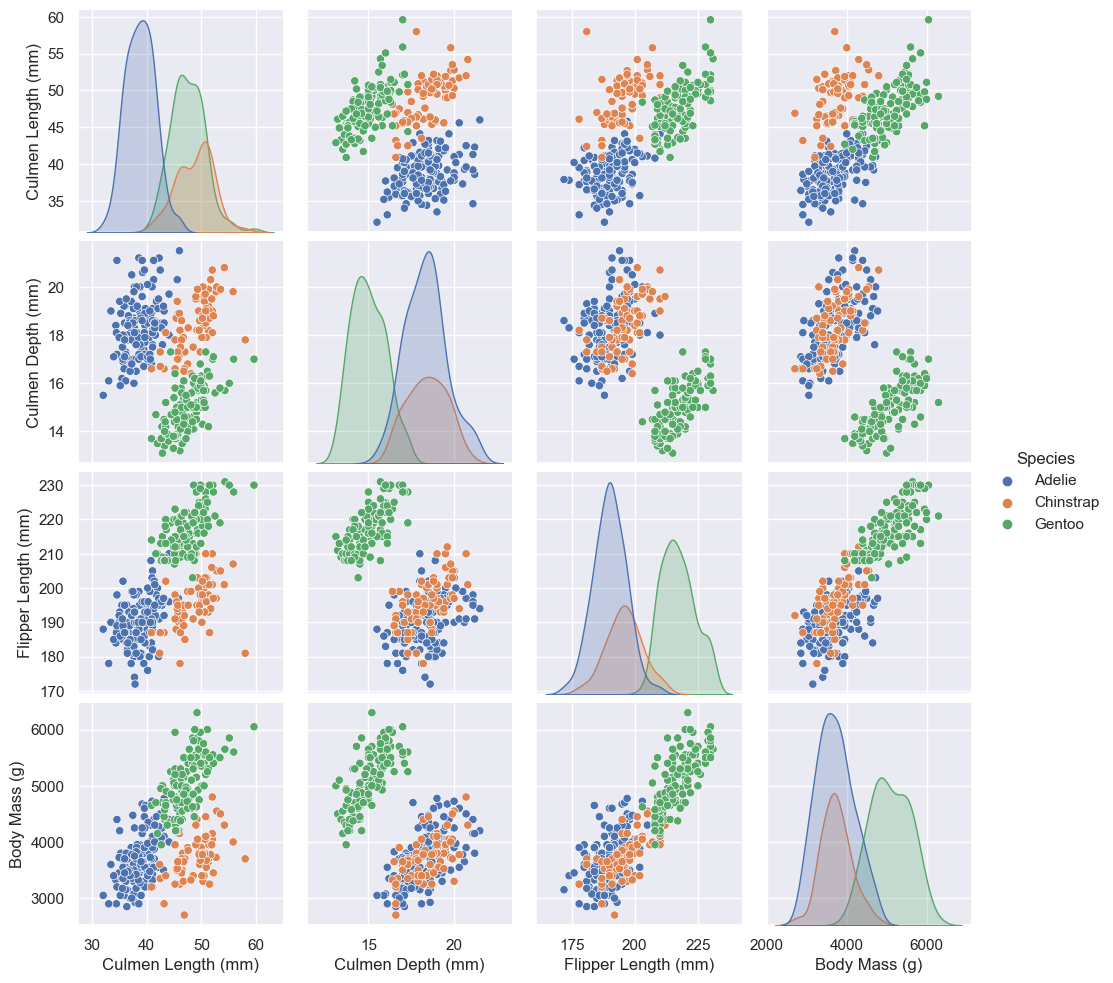

In [12]:
_ = sns.pairplot(df, hue="Species")
plt.show()

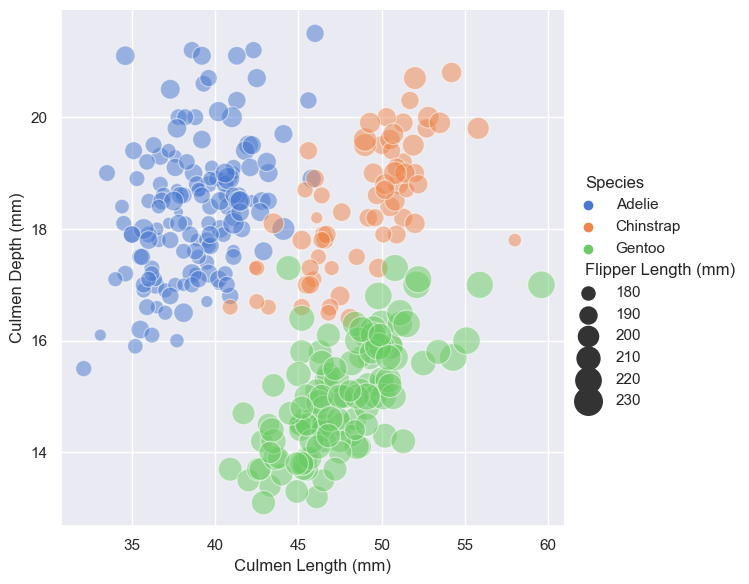

In [13]:
_ = sns.relplot(x="Culmen Length (mm)", y="Culmen Depth (mm)", hue="Species", size="Flipper Length (mm)",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=df)
plt.show()

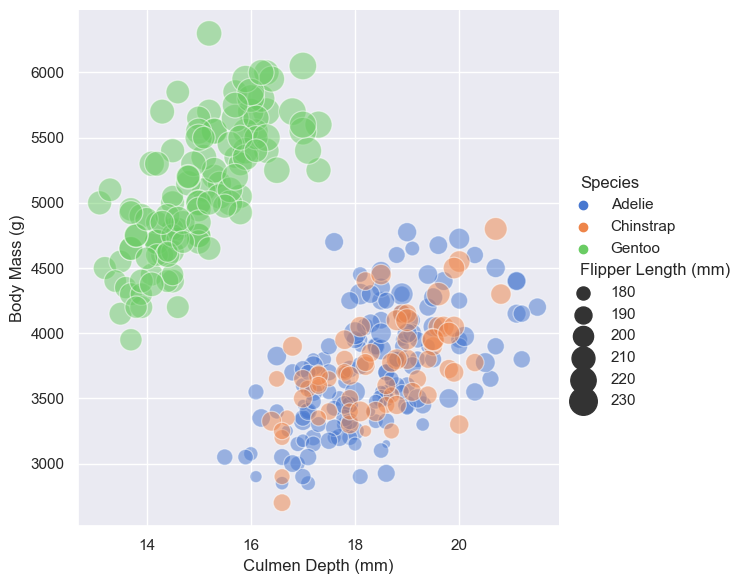

In [14]:
_ = sns.relplot(x="Culmen Depth (mm)", y="Body Mass (g)", hue="Species", size="Flipper Length (mm)",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=df)
plt.show()

# Preprocessing

### Label Encoding

In [15]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df['Sex'])
tf = le.transform(df['Sex'])
df['Sex'] = tf
df.head()

,Island,Sex,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Species
0,Torgersen,1,39.1,18.7,181.0,3750.0,Adelie
1,Torgersen,0,39.5,17.4,186.0,3800.0,Adelie
2,Torgersen,0,40.3,18.0,195.0,3250.0,Adelie
4,Torgersen,0,36.7,19.3,193.0,3450.0,Adelie
5,Torgersen,1,39.3,20.6,190.0,3650.0,Adelie


In [16]:
le = preprocessing.LabelEncoder()
le.fit(df['Island'])
tf = le.transform(df['Island'])
df['Island'] = tf
df.head()

,Island,Sex,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Species
0,2,1,39.1,18.7,181.0,3750.0,Adelie
1,2,0,39.5,17.4,186.0,3800.0,Adelie
2,2,0,40.3,18.0,195.0,3250.0,Adelie
4,2,0,36.7,19.3,193.0,3450.0,Adelie
5,2,1,39.3,20.6,190.0,3650.0,Adelie


### Train/Test Split

In [17]:
array = df.values
X = array[:,0:5]
y = array[:,6]

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.7, shuffle=True, random_state=123)

In [19]:
X_train[1:5]

array([[1, 1, 49.6, 18.2, 193.0],
       [0, 1, 50.7, 15.0, 223.0],
       [1, 1, 51.7, 20.3, 194.0],
       [1, 0, 58.0, 17.8, 181.0]], dtype=object)

### Standardization

In [20]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc_array = sc.fit_transform(X_train[:,2:5])

In [21]:
sc_array[1:5]

array([[ 1.23882624,  0.46015981, -0.4308757 ],
       [ 1.45481756, -1.2154566 ,  1.73078109],
       [ 1.65117331,  1.55978308, -0.35882047],
       [ 2.8882145 ,  0.25070776, -1.29553841]])

In [22]:
X_train_std = X_train
X_train_std[:,2:5] = sc_array[:,0:3]
X_train_std[1:5]

array([[1, 1, 1.2388262434139592, 0.4601598109952698,
        -0.43087569598131925],
       [0, 1, 1.454817562510629, -1.2154566042150914, 1.7307810896006373],
       [1, 1, 1.651173307143965, 1.5597830834770703, -0.358820469795254],
       [1, 0, 2.888214498333981, 0.25070775909397536,
        -1.2955384102141019]], dtype=object)

In [23]:
sc_array = sc.fit_transform(X_test[:,2:5])
X_test_std = X_test
X_test_std[:,2:5] = sc_array[:,0:3]
X_test_std[1:5]

array([[1, 0, 0.32428837585284787, 0.5545203558501002,
        -1.7055707276729273],
       [0, 0, -0.141474248955638, -1.459569877272498, 1.3032874865739799],
       [0, 0, 0.5750836353651091, -1.5602743889286275,
        0.7301716362412357],
       [1, 1, 1.2020717841457629, 0.8566338908184906,
        0.08541630461689845]], dtype=object)

# Classification Algorithms

In [24]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

### Unscaled Data

In [25]:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=20, shuffle=True, random_state=123)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.980 (0.060)
LDA: 0.990 (0.044)
KNN: 0.990 (0.044)
CART: 0.955 (0.120)
NB: 0.808 (0.205)
SVM: 0.990 (0.044)


### Standardized Data

In [26]:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=20, shuffle=True, random_state=123)
    cv_results = cross_val_score(model, X_train_std, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.980 (0.060)
LDA: 0.990 (0.044)
KNN: 0.990 (0.044)
CART: 0.945 (0.124)
NB: 0.808 (0.205)
SVM: 0.990 (0.044)


# Ensemble Algorithms

In [27]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier

num_folds = 20
scoring = 'accuracy'

ensembles = []
ensembles.append(('AB', AdaBoostClassifier()))
ensembles.append(('GBM', GradientBoostingClassifier()))
ensembles.append(('RF', RandomForestClassifier(n_estimators=10)))
ensembles.append(('ET', ExtraTreesClassifier(n_estimators=10)))
ensembles.append(('BG', BaggingClassifier()))

### Unscaled Data

In [28]:
results = []
names = []
for name, model in ensembles:
    kfold = KFold(n_splits=num_folds, shuffle=True, random_state=123)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

AB: 0.927 (0.118)
GBM: 0.968 (0.078)
RF: 0.970 (0.071)
ET: 0.980 (0.060)
BG: 0.957 (0.086)


### Standardized Data

In [29]:
results = []
names = []
for name, model in ensembles:
    kfold = KFold(n_splits=num_folds, shuffle=True, random_state=123)
    cv_results = cross_val_score(model, X_train_std, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

AB: 0.927 (0.118)
GBM: 0.968 (0.078)
RF: 0.957 (0.086)
ET: 0.990 (0.044)
BG: 0.958 (0.086)


## Tuning

In [30]:
from sklearn.model_selection import GridSearchCV

In [31]:
tuning_df = pd.DataFrame(columns = ('Model', 'Score', 'Param1', 'Param1_Val', 'Param2', 'Param2_Val', 'Param3', 'Param3_Val',  
                                   'Param4', 'Param4_Val'))

def append_results_df(model, score, param1, param1_val, param2, param2_val, param3, param3_val, param4, param4_val):
    new_row = len(tuning_df) + 1
    tuning_df.loc[new_row,'Model'] = model
    tuning_df.loc[new_row,'Score'] = score
    tuning_df.loc[new_row,'Param1'] = param1
    tuning_df.loc[new_row,'Param1_Val'] = param1_val
    tuning_df.loc[new_row,'Param2'] = param2
    tuning_df.loc[new_row,'Param2_Val'] = param2_val
    tuning_df.loc[new_row,'Param3'] = param3
    tuning_df.loc[new_row,'Param3_Val'] = param3_val
    tuning_df.loc[new_row,'Param4'] = param4
    tuning_df.loc[new_row,'Param4_Val'] = param4_val 

### Logistic Regression, Unscaled Data

In [32]:
c = np.array([1,0.1,0.01,0.001])
weight = np.array(['balanced', None])
penalty = np.array(['l1', 'l2', 'elasticnet', 'none'])
solver = np.array(['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'])
param_grid = dict(C=c, class_weight=weight, penalty=penalty, solver=solver)
model = LogisticRegression(solver='liblinear', multi_class='ovr', class_weight='balanced')
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=20)

In [33]:
grid.fit(X_train, y_train)

model = "Logistic Regression, Unscaled Data"
score = round(grid.best_score_,3)
param1 = "c"
param1_val = grid.best_estimator_.C
param2 = "class_weight"
param2_val = grid.best_estimator_.class_weight
param3 = "penalty"
param3_val = grid.best_estimator_.penalty
param4 = "solver"
param4_val = grid.best_estimator_.solver

append_results_df(model,score,param1,param1_val,param2,param2_val,param3,param3_val,param4,param4_val)

### Logistic Regression, Standardized Data

In [34]:
grid.fit(X_train_std, y_train)

model = "Logistic Regression, Standardized Data"
score = round(grid.best_score_,3)
param1 = "c"
param1_val = grid.best_estimator_.C
param2 = "class_weight"
param2_val = grid.best_estimator_.class_weight
param3 = "penalty"
param3_val = grid.best_estimator_.penalty
param4 = "solver"
param4_val = grid.best_estimator_.solver

append_results_df(model,score,param1,param1_val,param2,param2_val,param3,param3_val,param4,param4_val)

In [35]:
tuning_df

,Model,Score,Param1,Param1_Val,Param2,Param2_Val,Param3,Param3_Val,Param4,Param4_Val
1,"Logistic Regression, Unscaled Data",0.99,c,1.0,class_weight,balanced,penalty,l2,solver,liblinear
2,"Logistic Regression, Standardized Data",0.99,c,1.0,class_weight,balanced,penalty,l2,solver,liblinear


### Linear Discriminant Analysis, Unscaled Data

In [36]:
solver = np.array(['svd', 'lsqr', 'eigen'])
n_components = np.array([2,3,4,5])
param_grid = dict(solver=solver, n_components=n_components)
model = LinearDiscriminantAnalysis()
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=20)

In [37]:
grid.fit(X_train, y_train)

model = "LDA, Unscaled Data"
score = round(grid.best_score_,3)
param1 = "solver"
param1_val = grid.best_estimator_.solver
param2 = "n_components"
param2_val = grid.best_estimator_.n_components
param3 = ""
param3_val = ""
param4 = ""
param4_val = grid.best_estimator_.solver = ""

append_results_df(model,score,param1,param1_val,param2,param2_val,param3,param3_val,param4,param4_val)

### Linear Discriminant Analysis, Standardized Data

In [38]:
grid.fit(X_train_std, y_train)

model = "LDA, Standardized Data"
score = round(grid.best_score_,3)
param1 = "solver"
param1_val = grid.best_estimator_.solver
param2 = "n_components"
param2_val = grid.best_estimator_.n_components
param3 = ""
param3_val = ""
param4 = ""
param4_val = ""

append_results_df(model,score,param1,param1_val,param2,param2_val,param3,param3_val,param4,param4_val)

In [39]:
tuning_df

,Model,Score,Param1,Param1_Val,Param2,Param2_Val,Param3,Param3_Val,Param4,Param4_Val
1,"Logistic Regression, Unscaled Data",0.99,c,1.0,class_weight,balanced,penalty,l2,solver,liblinear
2,"Logistic Regression, Standardized Data",0.99,c,1.0,class_weight,balanced,penalty,l2,solver,liblinear
3,"LDA, Unscaled Data",0.99,solver,svd,n_components,2,,,,
4,"LDA, Standardized Data",0.99,solver,svd,n_components,2,,,,


### KNN, Standardized Data

In [40]:
neighbors = np.array([2,3,4,5,6,7])
p = np.array([1,2])
algorithm = np.array(['auto', 'ball_tree', 'kd_tree', 'brute'])
param_grid = dict(n_neighbors=neighbors, p=p, algorithm=algorithm)
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=20)

In [41]:
grid.fit(X_train_std, y_train)

model = "KNN, Standardized Data"
score = round(grid.best_score_,3)
param1 = "n_neighbors"
param1_val = grid.best_estimator_.n_neighbors
param2 = "p"
param2_val = grid.best_estimator_.p
param3 = "algorithm"
param3_val = grid.best_estimator_.algorithm
param4 = ""
param4_val = ""

append_results_df(model,score,param1,param1_val,param2,param2_val,param3,param3_val,param4,param4_val)

In [42]:
tuning_df

,Model,Score,Param1,Param1_Val,Param2,Param2_Val,Param3,Param3_Val,Param4,Param4_Val
1,"Logistic Regression, Unscaled Data",0.99,c,1.0,class_weight,balanced,penalty,l2,solver,liblinear
2,"Logistic Regression, Standardized Data",0.99,c,1.0,class_weight,balanced,penalty,l2,solver,liblinear
3,"LDA, Unscaled Data",0.99,solver,svd,n_components,2,,,,
4,"LDA, Standardized Data",0.99,solver,svd,n_components,2,,,,
5,"KNN, Standardized Data",0.99,n_neighbors,2,p,1,algorithm,auto,,


### Extra Trees Classifier, Unscaled Data

In [43]:
n_est = np.array([25,50,75,100,125,150])
max_depth = np.array([2,3,4,5,6,7,8,9])
param_grid = dict(n_estimators=n_est, max_depth=max_depth)
model = ExtraTreesClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)

In [44]:
grid.fit(X_train, y_train)

model = "ExtraTrees, Unscaled Data"
score = round(grid.best_score_,3)
param1 = "n_estimators"
param1_val = grid.best_estimator_.n_estimators
param2 = "max_depth"
param2_val = grid.best_estimator_.max_depth
param3 = ""
param3_val = ""
param4 = ""
param4_val = ""

append_results_df(model,score,param1,param1_val,param2,param2_val,param3,param3_val,param4,param4_val)

### Extra Trees Classifier, Standardized Data

In [45]:
grid.fit(X_train_std, y_train)

model = "ExtraTrees, Standardized Data"
score = round(grid.best_score_,3)
param1 = "n_estimators"
param1_val = grid.best_estimator_.n_estimators
param2 = "max_depth"
param2_val = grid.best_estimator_.max_depth
param3 = ""
param3_val = ""
param4 = ""
param4_val = ""

append_results_df(model,score,param1,param1_val,param2,param2_val,param3,param3_val,param4,param4_val)

In [46]:
tuning_df

,Model,Score,Param1,Param1_Val,Param2,Param2_Val,Param3,Param3_Val,Param4,Param4_Val
1,"Logistic Regression, Unscaled Data",0.99,c,1.0,class_weight,balanced,penalty,l2,solver,liblinear
2,"Logistic Regression, Standardized Data",0.99,c,1.0,class_weight,balanced,penalty,l2,solver,liblinear
3,"LDA, Unscaled Data",0.99,solver,svd,n_components,2,,,,
4,"LDA, Standardized Data",0.99,solver,svd,n_components,2,,,,
5,"KNN, Standardized Data",0.99,n_neighbors,2,p,1,algorithm,auto,,
6,"ExtraTrees, Unscaled Data",1.0,n_estimators,125,max_depth,9,,,,
7,"ExtraTrees, Standardized Data",0.989,n_estimators,25,max_depth,5,,,,


# Performance Upon Test Set

In [47]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

### Logistic Regression, Unscaled Data

In [48]:
LR = tuning_df[tuning_df['Model'] == 'Logistic Regression, Unscaled Data']
LR

,Model,Score,Param1,Param1_Val,Param2,Param2_Val,Param3,Param3_Val,Param4,Param4_Val
1,"Logistic Regression, Unscaled Data",0.99,c,1.0,class_weight,balanced,penalty,l2,solver,liblinear


In [51]:
LR_c = LR['Param1_Val'][1]
LR_class_weight = LR['Param2_Val'][1]
LR_penalty = LR['Param3_Val'][1]
LR_solver = LR['Param4_Val'][1]

In [52]:
model = LogisticRegression(C=LR_c, 
                           class_weight = LR_class_weight, 
                           penalty = LR_penalty, 
                           solver = LR_solver)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print("Logistic Regression on the Test Set, Unscaled Data")
print(round(accuracy_score(y_test, predictions),3))
print("")
print("Confusion Matrix")
print(confusion_matrix(y_test, predictions))

Logistic Regression on the Test Set, Unscaled Data
0.983

Confusion Matrix
[[96  0  0]
 [ 4 45  0]
 [ 0  0 89]]


### Logistic Regression, Standardized Data

In [53]:
LR = tuning_df[tuning_df['Model'] == 'Logistic Regression, Standardized Data']
LR

,Model,Score,Param1,Param1_Val,Param2,Param2_Val,Param3,Param3_Val,Param4,Param4_Val
2,"Logistic Regression, Standardized Data",0.99,c,1.0,class_weight,balanced,penalty,l2,solver,liblinear


In [54]:
LR_c = LR['Param1_Val'][2]
LR_class_weight = LR['Param2_Val'][2]
LR_penalty = LR['Param3_Val'][2]
LR_solver = LR['Param4_Val'][2]

In [55]:
model = LogisticRegression(C=LR_c, 
                           class_weight = LR_class_weight, 
                           penalty = LR_penalty, 
                           solver = LR_solver)
model.fit(X_train_std, y_train)
predictions = model.predict(X_test_std)
print("Logistic Regression on the Test Set, Scaled Data")
print(round(accuracy_score(y_test, predictions),3))
print("")
print("Confusion Matrix")
print(confusion_matrix(y_test, predictions))

Logistic Regression on the Test Set, Scaled Data
0.983

Confusion Matrix
[[96  0  0]
 [ 4 45  0]
 [ 0  0 89]]


### Linear Discriminant Analysis, Unscaled Data

In [56]:
LDA = tuning_df[tuning_df['Model'] == 'LDA, Unscaled Data']
LDA

,Model,Score,Param1,Param1_Val,Param2,Param2_Val,Param3,Param3_Val,Param4,Param4_Val
3,"LDA, Unscaled Data",0.99,solver,svd,n_components,2,,,,


In [57]:
LDA_solver = LDA['Param1_Val'][3]
LDA_n_components = LDA['Param2_Val'][3]

In [58]:
model = LinearDiscriminantAnalysis(solver = LDA_solver, 
                                   n_components = LDA_n_components)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print("LDA on the Test Set, Unscaled Data")
print(round(accuracy_score(y_test, predictions),3))
print("")
print("Confusion Matrix")
print(confusion_matrix(y_test, predictions))

LDA on the Test Set, Unscaled Data
0.987

Confusion Matrix
[[96  0  0]
 [ 3 46  0]
 [ 0  0 89]]


### Linear Discriminant Analysis, Standardized Data

In [59]:
LDA = tuning_df[tuning_df['Model'] == 'LDA, Standardized Data']
LDA

,Model,Score,Param1,Param1_Val,Param2,Param2_Val,Param3,Param3_Val,Param4,Param4_Val
4,"LDA, Standardized Data",0.99,solver,svd,n_components,2,,,,


In [60]:
LDA_solver = LDA['Param1_Val'][4]
LDA_n_components = LDA['Param2_Val'][4]

In [61]:
model = LinearDiscriminantAnalysis(solver = LDA_solver, 
                                   n_components = LDA_n_components)
model.fit(X_train_std, y_train)
predictions = model.predict(X_test_std)
print("LDA on the Test Set, Unscaled Data")
print(round(accuracy_score(y_test, predictions),3))
print("")
print("Confusion Matrix")
print(confusion_matrix(y_test, predictions))

LDA on the Test Set, Unscaled Data
0.987

Confusion Matrix
[[96  0  0]
 [ 3 46  0]
 [ 0  0 89]]


### KNN, Standardized Data

In [62]:
KNN = tuning_df[tuning_df['Model'] == 'KNN, Standardized Data']
KNN

,Model,Score,Param1,Param1_Val,Param2,Param2_Val,Param3,Param3_Val,Param4,Param4_Val
5,"KNN, Standardized Data",0.99,n_neighbors,2,p,1,algorithm,auto,,


In [63]:
KNN_n_neighbors = KNN['Param1_Val'][5]
KNN_p = KNN['Param2_Val'][5]
KNN_algorithm = KNN['Param3_Val'][5]

In [64]:
model = KNeighborsClassifier(n_neighbors = KNN_n_neighbors, 
                             p = KNN_p,
                             algorithm = KNN_algorithm)
model.fit(X_train_std, y_train)
predictions = model.predict(X_test_std)
print("KNN on the Test Set, Unscaled Data")
print(round(accuracy_score(y_test, predictions),3))
print("")
print("Confusion Matrix")
print(confusion_matrix(y_test, predictions))

KNN on the Test Set, Unscaled Data
0.983

Confusion Matrix
[[96  0  0]
 [ 4 45  0]
 [ 0  0 89]]


### Extra Trees Classifier, Unscaled Data

In [65]:
ET = tuning_df[tuning_df['Model'] == 'ExtraTrees, Unscaled Data']
ET

,Model,Score,Param1,Param1_Val,Param2,Param2_Val,Param3,Param3_Val,Param4,Param4_Val
6,"ExtraTrees, Unscaled Data",1.0,n_estimators,125,max_depth,9,,,,


In [66]:
ET_n_estimators = ET['Param1_Val'][6]
ET_max_depth = ET['Param2_Val'][6]

In [67]:
model = ExtraTreesClassifier(n_estimators = ET_n_estimators, 
                             max_depth = ET_max_depth)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print("ExtraTrees on the Test Set, Unscaled Data")
print(round(accuracy_score(y_test, predictions),3))
print("")
print("Confusion Matrix")
print(confusion_matrix(y_test, predictions))

ExtraTrees on the Test Set, Unscaled Data
0.979

Confusion Matrix
[[96  0  0]
 [ 5 44  0]
 [ 0  0 89]]


### Extra Trees Classifier, Standardized Data

In [68]:
ET = tuning_df[tuning_df['Model'] == 'ExtraTrees, Unscaled Data']
ET

,Model,Score,Param1,Param1_Val,Param2,Param2_Val,Param3,Param3_Val,Param4,Param4_Val
6,"ExtraTrees, Unscaled Data",1.0,n_estimators,125,max_depth,9,,,,


In [69]:
model = ExtraTreesClassifier(n_estimators = ET_n_estimators, 
                             max_depth = ET_max_depth)
model.fit(X_train_std, y_train)
predictions = model.predict(X_test_std)
print("ExtraTrees on the Test Set, Standardized Data")
print(round(accuracy_score(y_test, predictions),3))
print("")
print("Confusion Matrix")
print(confusion_matrix(y_test, predictions))

ExtraTrees on the Test Set, Standardized Data
0.983

Confusion Matrix
[[96  0  0]
 [ 4 45  0]
 [ 0  0 89]]
